In [1]:
# Αα,Ββ,Γγ,Δδ,Εε,Ζζ,Ηη,Θθ,Ιι,Κκ,Λλ,Μμ,Νν,Ξξ,Οο,Ππ,Ρρ,Σσ/ς,Ττ,Υυ,Φφ,Χχ,Ψψ,Ωω
# dot syntax for broadcasting

In [10]:
using Pkg
Pkg.add("Plots")
# I don't think I have to do this again

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Wayland_protocols_jll ──────── v1.25.0+0
   Installed FFMPEG ─────────────────────── v0.4.1
   Installed IrrationalConstants ────────── v0.1.1
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed Xorg_xcb_util_renderutil_jll ─ v0.3.9+1
   Installed Showoff ────────────────────── v1.0.3
   Installed Scratch ────────────────────── v1.1.0
   Installed Adapt ──────────────────────── v3.3.3
   Installed ColorTypes ─────────────────── v0.11.0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Graphite2_jll ──────────────── v1.3.14+0
   Installed GR_jll ─────────────────────── v0.64.2+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed libass_jll ─────────────────── v0.15.1+0
   Installed Preferences ────────────────── v1.2.5
   Installed JSON ───────────────────────── v0.21.3
   Installed Latexify ───────────────────── v0.15.14
   Installed Plo

  [34da2185] + Compat v3.42.0
  [d38c429a] + Contour v0.5.7
  [9a962f9c] + DataAPI v1.9.0
  [864edb3b] + DataStructures v0.18.11
  [e2d170a0] + DataValueInterfaces v1.0.0
  [ffbed154] + DocStringExtensions v0.8.6
  [c87230d0] + FFMPEG v0.4.1
  [53c48c17] + FixedPointNumbers v0.8.4
  [59287772] + Formatting v0.4.2
  [28b8d3ca] + GR v0.64.2
  [5c1252a2] + GeometryBasics v0.4.2
  [42e2da0e] + Grisu v1.0.2
  [cd3eb016] + HTTP v0.9.17
  [83e8ac13] + IniFile v0.5.1
  [3587e190] + InverseFunctions v0.1.3
  [92d709cd] + IrrationalConstants v0.1.1
  [c8e1da08] + IterTools v1.4.0
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [692b3bcd] + JLLWrappers v1.4.1
  [682c06a0] + JSON v0.21.3
  [b964fa9f] + LaTeXStrings v1.3.0
  [23fbe1c1] + Latexify v0.15.14
  [2ab3a3ac] + LogExpFunctions v0.3.10
  [1914dd2f] + MacroTools v0.5.9
  [739be429] + MbedTLS v1.0.3
  [442fdcdd] + Measures v0.3.1
  [e1d29d7a] + Missings v1.0.2
  [77ba4419] + NaNMath v1.0.0
  [bac558e1] + OrderedCollections v1.4.1
  [69de0

  ✓ Xorg_libXdmcp_jll
  ✓ libpng_jll
  ✓ x265_jll
  ✓ libfdk_aac_jll
  ✓ Graphite2_jll
  ✓ x264_jll
  ✓ Zstd_jll
  ✓ HTTP
  ✓ Libmount_jll
  ✓ Libiconv_jll
  ✓ Wayland_protocols_jll
  ✓ Libffi_jll
  ✓ Expat_jll
  ✓ Bzip2_jll
  ✓ PCRE_jll
  ✓ Libgpg_error_jll
  ✓ Xorg_libpthread_stubs_jll
  ✓ LZO_jll
  ✓ LAME_jll
  ✓ Pixman_jll
  ✓ FriBidi_jll
  ✓ Libuuid_jll
  ✓ LERC_jll
  ✓ SortingAlgorithms
  ✓ ChangesOfVariables
  ✓ StaticArrays
  ✓ libvorbis_jll
  ✓ FreeType2_jll
  ✓ XML2_jll
  ✓ Latexify
  ✓ Libgcrypt_jll
  ✓ Libtiff_jll
  ✓ Fontconfig_jll
  ✓ Wayland_jll
  ✓ Contour
  ✓ Gettext_jll
  ✓ XSLT_jll
  ✓ LogExpFunctions
  ✓ StructArrays
  ✓ Xorg_libxcb_jll
  ✓ Glib_jll
  ✓ Xorg_xcb_util_jll
  ✓ Xorg_libX11_jll
  ✓ Xorg_xcb_util_image_jll
  ✓ Xorg_xcb_util_renderutil_jll
  ✓ Xorg_xcb_util_keysyms_jll
  ✓ Xorg_xcb_util_wm_jll
  ✓ Xorg_libXfixes_jll
  ✓ JSON
  ✓ StatsBase
  ✓ Xorg_libxkbfile_jll
  ✓ Xorg_libXext_jll
  ✓ Xorg_libXrender_jll
  ✓ Xorg_xkbcomp_jll
  ✓ Libglvnd_jll
  ✓ Xorg_li

### 1. Spectral Structure

#### 1a. Harmonics

In [5]:
function harmonic(t; f1=1, alist = 1, Φlist = 0)
    f = zeros(length(alist))
    for i = 1:length(alist)
        f[i] = i*f1
    end
    value = alist .* cos.(2 .* pi .* (f .* t .- Φlist))
    return sum(value)
end

harmonic (generic function with 1 method)

In [6]:
harmonic(0.9; f1=2, alist=[1, 0.5], Φlist = [0, 0])

-0.09549150281252694

In [7]:
function cosines(t; flist=1, alist=1, Φlist = 0)
    value = alist .* cos.(2 .* pi .* (flist .* t .- Φlist))
    return sum(value)
end

cosines (generic function with 1 method)

In [9]:
cosines(0.98; flist=[200, 205], alist=[1, 0.5], Φlist = [0, 0])

1.404508497187477

In [11]:
using Plots

In [13]:
function plot_instantaneous(f; range = (0.0,1.0), fs=1000)
    println(f(t))
end

plot_instantaneous (generic function with 1 method)

In [14]:
plot_instantaneous(1; f=harmonic)

1.0


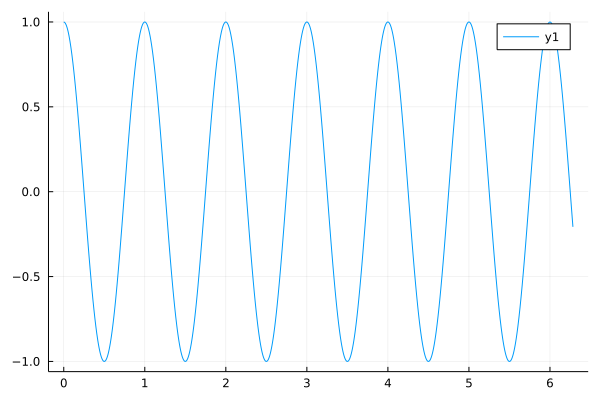

In [15]:
plot(harmonic, 0, 2*pi)